In [125]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:
df = pd.read_csv('Sample - Superstore.csv', index_col = 0)

In [127]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [129]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

<AxesSubplot:xlabel='Order Date', ylabel='count'>

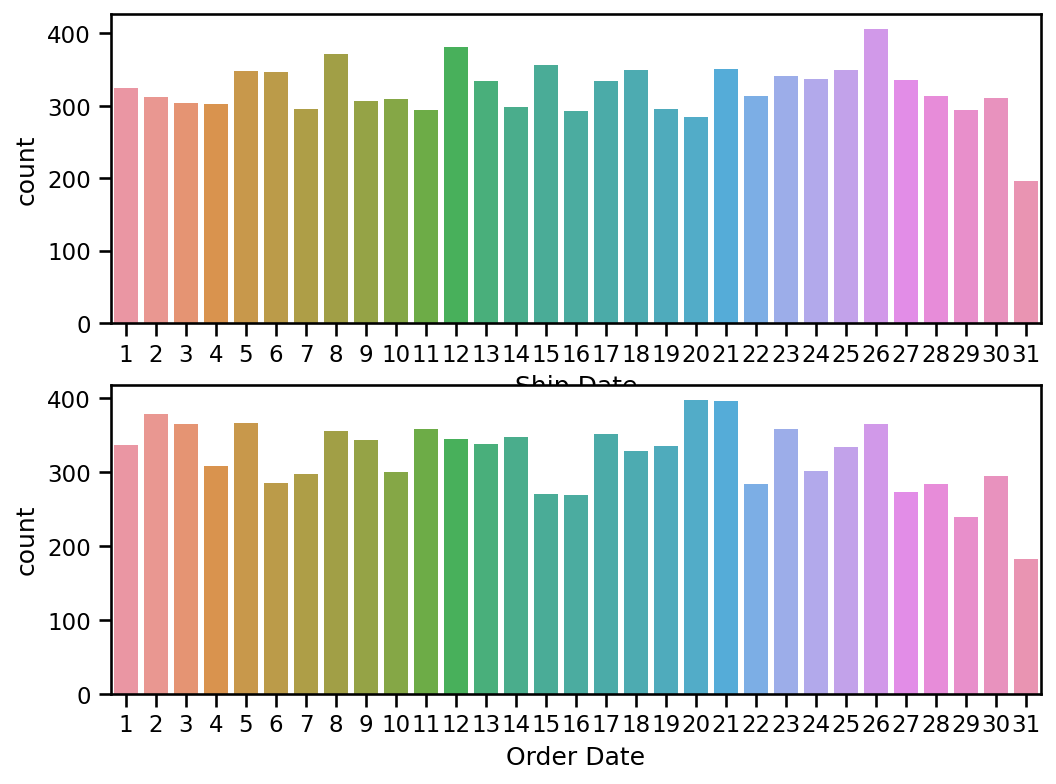

In [130]:
## Check that the dates were parsed correctly, if dates were parsed incorrectly we would not expect any day values above 12


fig, axs = plt.subplots(nrows = 2, dpi=150, figsize=(8,6))
sns.countplot(x = df['Ship Date'].dt.day, ax=axs[0])
sns.countplot(x = df['Order Date'].dt.day, ax=axs[1])

In [131]:
# Create a days to ship column "order date - ship date"

df['day_to_ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Reorder columns so date/time values or adjacent

df = df[['Order ID', 'Order Date', 'Ship Date', 'day_to_ship', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit']]
df.head()

,Order ID,Order Date,Ship Date,day_to_ship,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Days to Ship

### Below we will explore one of our key logistics KPI's: our days to ship an item.

As shown in our eda below our average days to ship from 2014 - 2017 ranges from 3.90 days to 4 days. While there is significant room for improvement we are extremely consistent on a year over year basis. 2018 YTD stands as an outlier. We only have 5 days of data to report on but our current days to ship stands at 4.92 days which is a deviation of 1.92 days from previous years. There is little to no correlation between days to ship and seasonality in previous years so 2018 remains a close watch over upcoming weeks as we get more shipping data, if we don't see a reversion back to our mean we will need to explore shipping impacts and seek corrective action.

One area of concern is our days to ship by ship class, while we are fulfilling same day shipments with a success rate of 99.76%. Our average days to ship on all other classes is greater than 2.5 days which speaks to a possible resource issue in warehouse/shipping. While our shipping personal are able to fulfill same day orders most of the time based on the below data our shipping personal are working on a shipping backlog of greater than 2.5 days on average for all other ship classes. Shipping/warehouse department should be consulted with to confirm possible resource constraints or opportunities to improve days to ship.

Reducing days to ship provides us a clear line of sight to improved product pull through and increased top line revenue by optimizing warehouse space for products available for sale vs. sold product storage which improves product pull through and prevents shipping/receiving log jambs.

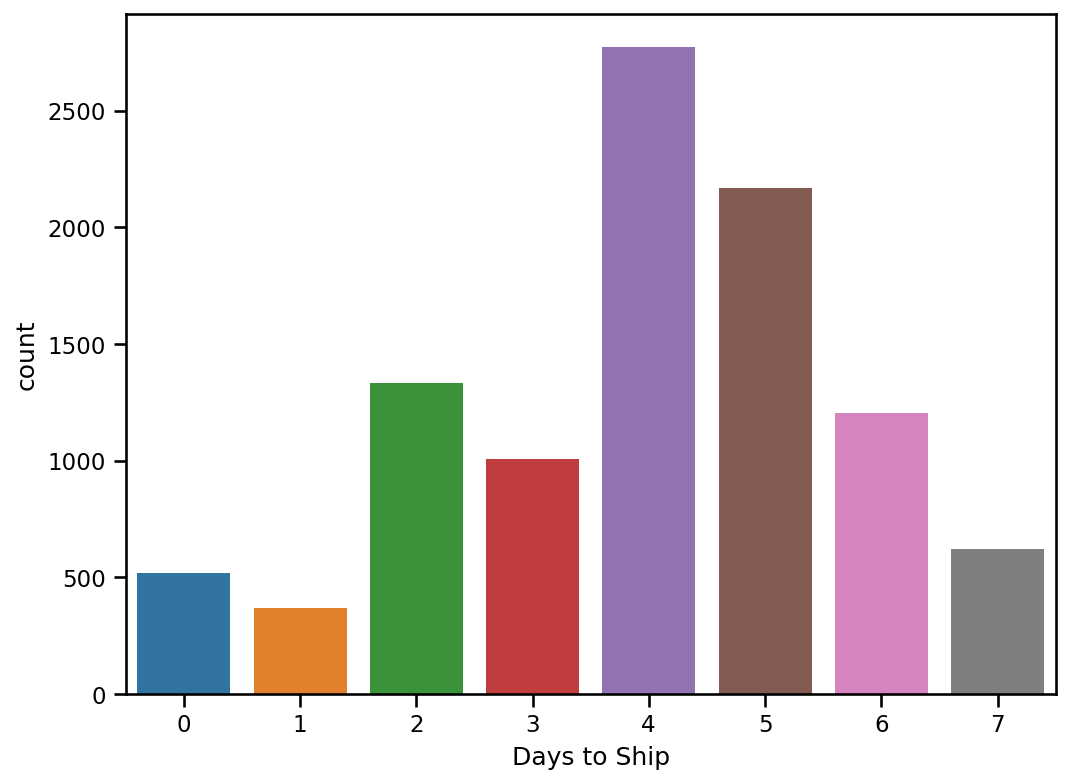

In [132]:
plt.figure(dpi=150, figsize=(8,6))

sns.countplot(x = df['day_to_ship'].sort_values(), data = df)
plt.xlabel('Days to Ship');

# A significant amount of our orders take 4-5 days to ship (ship date - initial order)

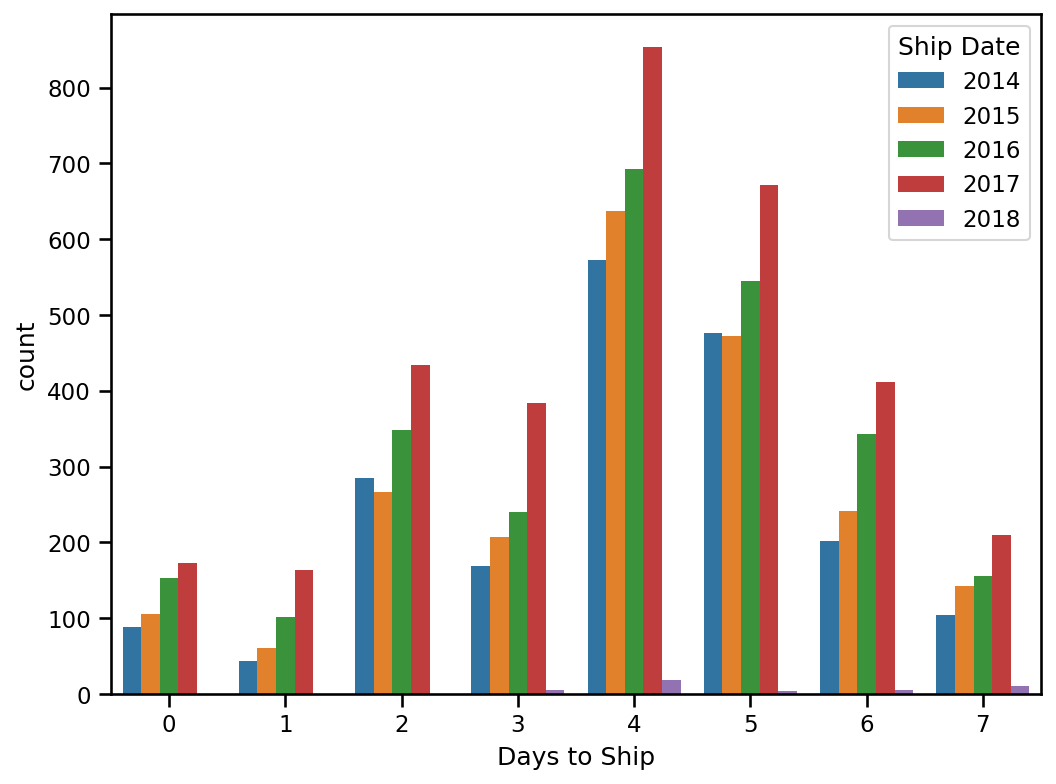

In [133]:
plt.figure(dpi=150, figsize=(8,6))

sns.countplot(x = df['day_to_ship'].sort_values(), data = df, hue = df['Ship Date'].dt.year)
plt.xlabel('Days to Ship');

# Days to ship seems consistent across years there seems to be little to no improvement year over year

In [134]:
avg_d_ship = df.groupby(df['Ship Date'].dt.year).mean()
avg_d_ship[['day_to_ship','Sales','Profit']]

# Average days to ship, sales and profit by year. The below frame further expands on the above chart.
# Our average day to ship for the years 2014 - 2017 is 4 days, 2018 YTD laggin at 4.92 days to ship


,day_to_ship,Sales,Profit
Ship Date,,,
2014,3.984021,242.465563,24.377694
2015,4.018301,224.984750,29.507992
2016,3.939876,237.131789,32.172654
2017,3.906146,221.280568,27.958485
2018,4.928571,122.849924,22.256890


Text(0, 0.5, 'Days to Ship')

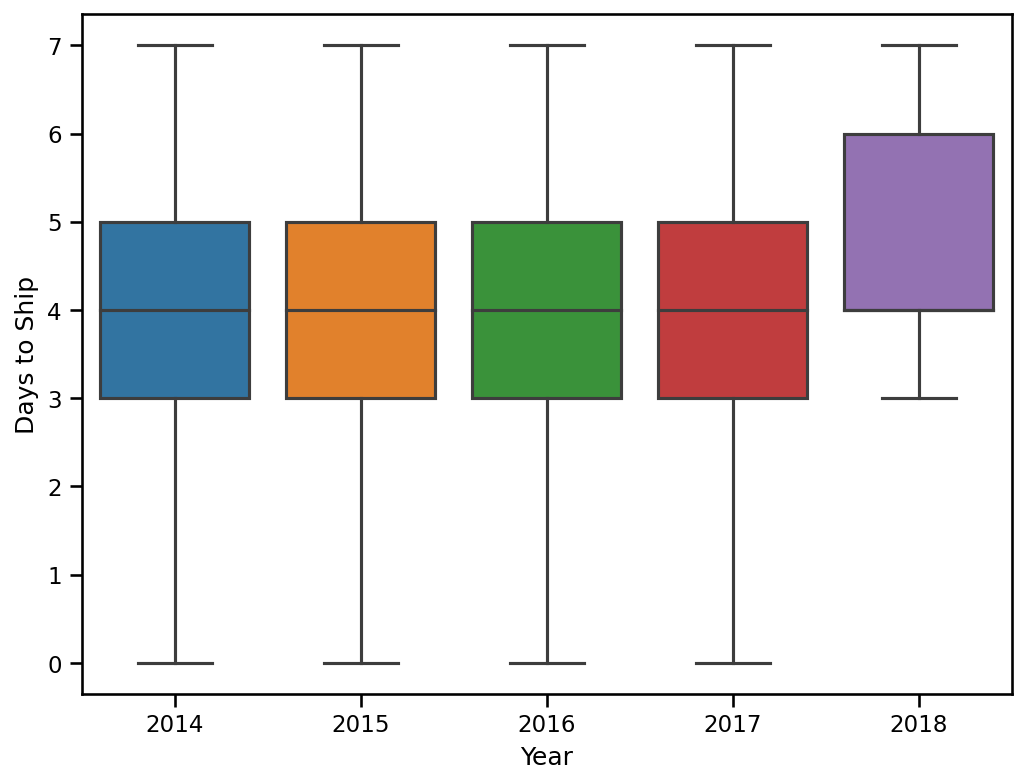

In [135]:
plt.figure(dpi=150, figsize=(8,6))

sns.boxplot(x = df['Ship Date'].dt.year, y = 'day_to_ship', data = df)
plt.xlabel('Year')
plt.ylabel('Days to Ship')

# As seen in the boxplot below with our median around 4 days and our IQR between 3-5 days for years 2014 - 2017
# 2018 appears to be an outlier but with such a small amount of data it would be unwise to make any business decision based 
# on current data. 2018 remains a watch-out if days to ship doesn't revert back to mean further action needs to be taken
# to improve shipdate

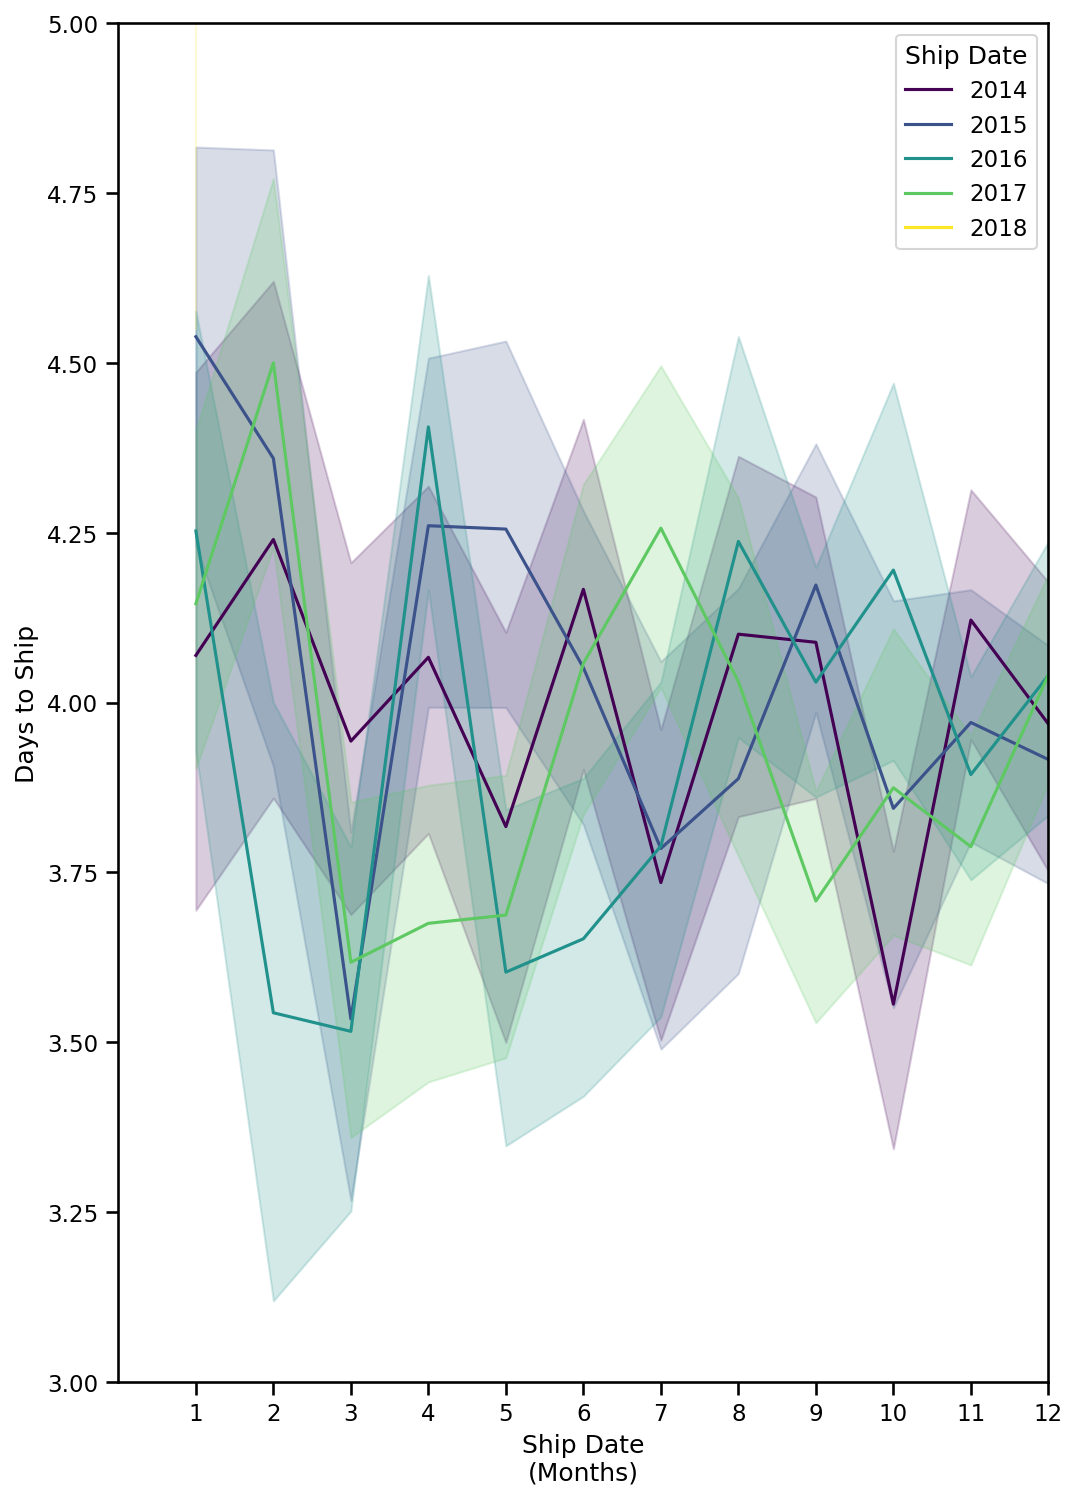

In [136]:
plt.figure(dpi=150, figsize=(8,12))
sns.lineplot(x = df['Ship Date'].dt.month, y = 'day_to_ship', data = df, hue = df['Ship Date'].dt.year, palette = 'viridis')
plt.xticks(ticks = range(1,13))
plt.ylabel("Days to Ship")
plt.xlabel("Ship Date" "\n" "(Months)")
plt.xlim(0,12)
plt.ylim(3,5);

# In the lineplot below I sought to explore the possibility that seasonality may have an effect on days to ship but based 
# on the below chart there appears to be little to no correlation between the month and days to ship.
# while some of the values and error values are highest in january/february that does not appear to be a consistant trend
# With no clear trend in seasonality it is even more important to keep a close eye on ship for the remainder of january 2018
# to ensure the days to ship does not continue moving away from the mean

In [137]:
df_corr = df[['Ship Date','day_to_ship']]
df_corr['Ship Date'] = df['Ship Date'].dt.month
df_corr.corr()

# As expected there's a weak correlation between month and days to ship

<ipython-input-137-bf55b29a7347>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Ship Date'] = df['Ship Date'].dt.month


,Ship Date,day_to_ship
Ship Date,1.000000,-0.009657
day_to_ship,-0.009657,1.000000


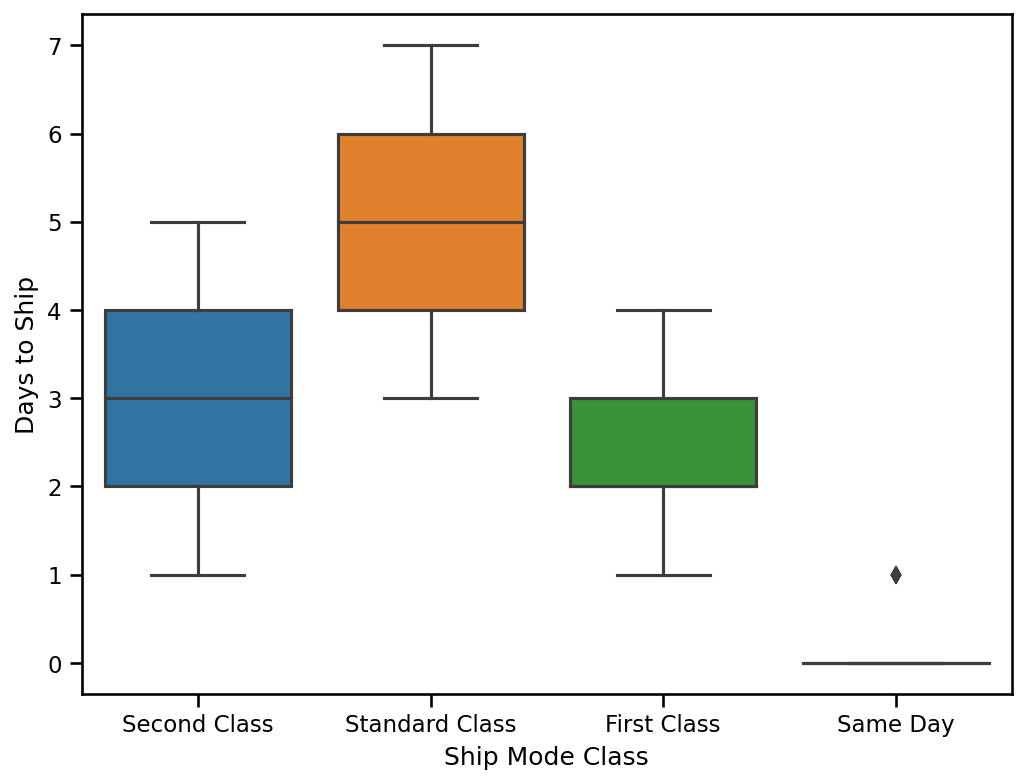

In [138]:
plt.figure(dpi=150, figsize=(8,6))

sns.boxplot(x = 'Ship Mode' , y = 'day_to_ship', data = df)
plt.xlabel('Ship Mode Class')
plt.ylabel('Days to Ship');

In [139]:
# Percentage of Same day deliviers that took greater than 0 days to ship
(df[(df['Ship Mode'] == 'Same Day') & df['day_to_ship'] > 0]['day_to_ship'].count()/df['day_to_ship'].count())*100

0.24014408645187113

# Sales Analysis

In [140]:
df.head()

,Order ID,Order Date,Ship Date,day_to_ship,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<AxesSubplot:title={'center':'Monthly Sales Volume over time'}, xlabel='Order Date', ylabel='Quantity of Items Sold Per Month'>

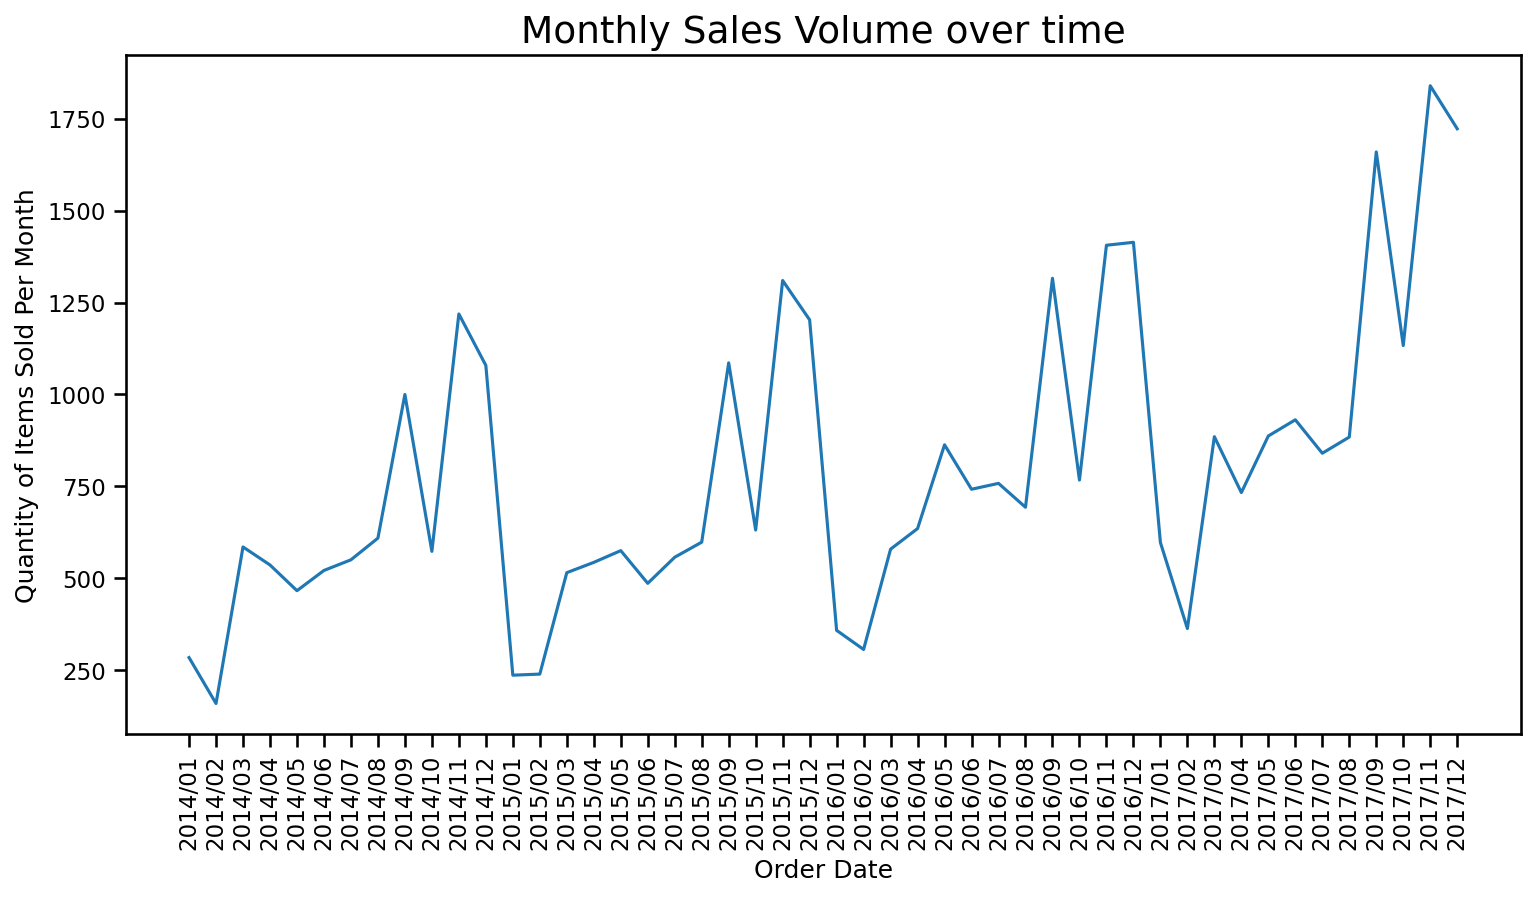

In [150]:
month_sales_volume = df[['Order Date','Quantity']].groupby(df['Order Date'].dt.strftime('%Y/%m')).sum().reset_index().sort_values('Order Date')

plt.figure(dpi=150, figsize=(12,6))
plt.grid(False)
plt.xticks(rotation=90)
plt.ylabel("Quantity of Items Sold Per Month")
plt.xlabel("Order Date")
plt.title('Monthly Sales Volume over time', fontsize=18)
sns.lineplot(x = 'Order Date', y = 'Quantity', data = month_sales_volume)

# There appears to be some seasonality to our sales with sales peaking in November and December befor plateauing in January and
# February. Sales volume has shown moderate growth from 2014 to 2016 but 2017 appears to have a significant increase in sales
# volume

<AxesSubplot:title={'center':'Sales Volume by Month'}, xlabel='Order Date', ylabel='Quantity'>

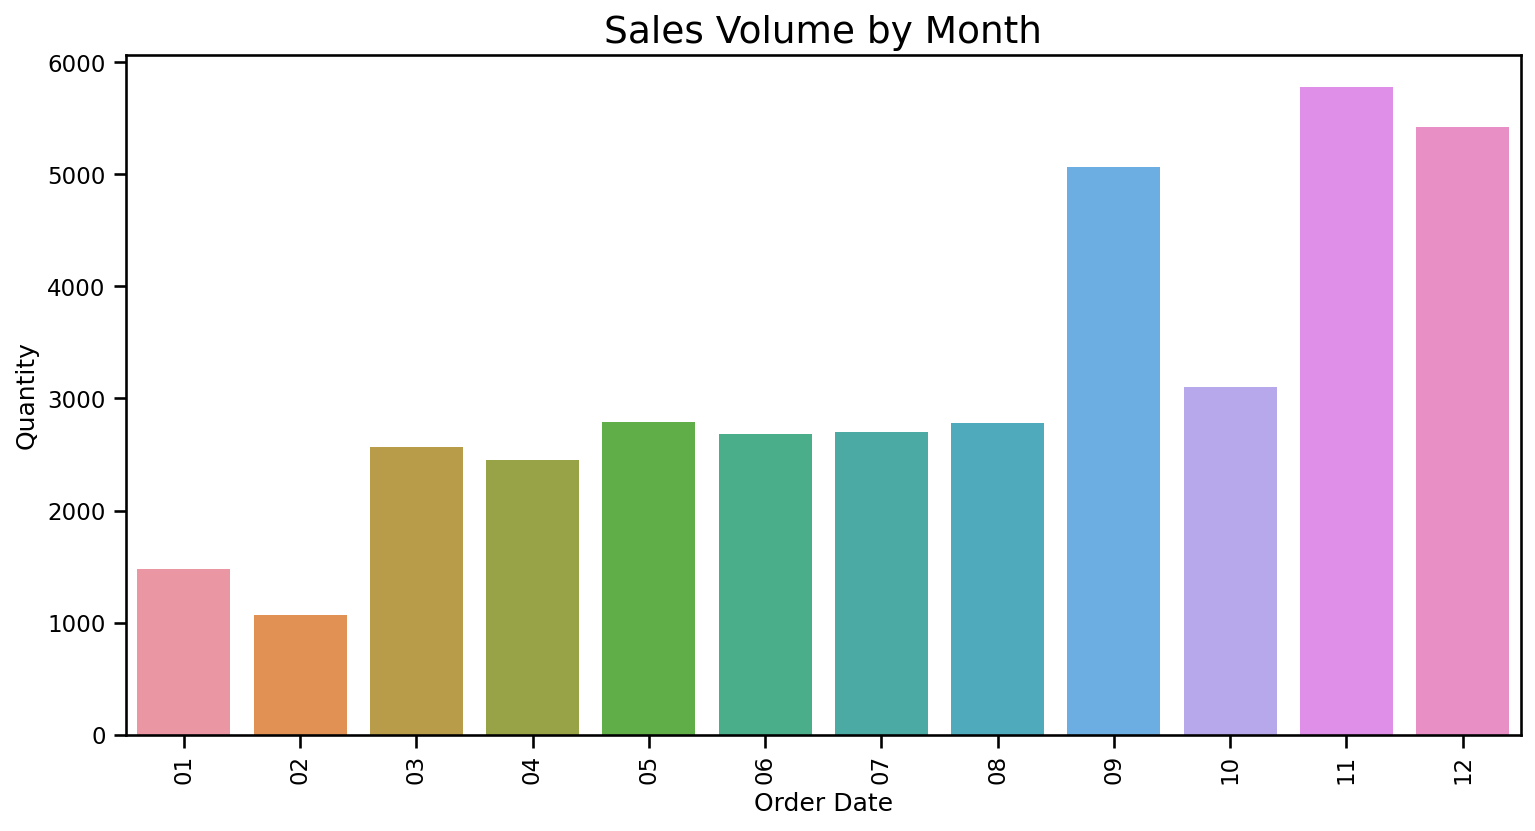

In [158]:
month_sales_volume_month = df[['Order Date','Quantity']].groupby(df['Order Date'].dt.strftime('%m')).sum().reset_index().sort_values('Order Date')

plt.figure(dpi=150, figsize=(12,6))
plt.grid(False)
plt.xticks(rotation=90)
plt.ylabel("Quantity of Items Sold Per Month")
plt.xlabel("Order Month")
plt.title('Sales Volume by Month', fontsize=18)
sns.barplot(x = 'Order Date', y = 'Quantity', data = month_sales_volume_month)

#As indicated in our previous chart and validated with the chart below our highest volume months are November, December and
#September. Our lowest volume months are January and February

In [193]:
bottom_twenty_products_volume = df[['Product Name', 'Quantity']].groupby('Product Name')['Quantity'].sum().reset_index()\
.sort_values('Quantity', ascending = False)
bottom_twenty_products_volume = bottom_twenty_products_volume.nsmallest(20,'Quantity')


In [194]:
bottom_twenty_products_sales = df.groupby('Product Name')['Sales'].sum().reset_index()\
.sort_values('Sales', ascending = False)
bottom_twenty_products_sales = bottom_twenty_products_sales.nsmallest(20,'Sales')

In [197]:
cross_bottom_sales_volume = bottom_twenty_products_volume.merge(bottom_twenty_products_sales['Product Name'])
cross_bottom_sales_volume

#Analyzing the 20 lowest volume products and the 20 lowest sales revenue products and exploring the cross section of the 2 sets
#We get products that are among the lowest volume and sales revenue producing products. The list of 5 products below provide 
#very little business value and there may be an opportunity to replace these products with higher volume/revenue driving 
#products

,Product Name,Quantity
0,Xerox 20,1
1,Avery 5,2
2,Xerox 1989,2
3,Grip Seal Envelopes,2
4,Avery Hi-Liter Pen Style Six-Color Fluorescent...,2
5,PNY Rapid USB Car Charger - Black,2


In [199]:
top_twenty_products_sales = df.groupby('Product Name')['Sales'].sum().reset_index()\
.sort_values('Sales', ascending = False)
top_twenty_products_sales = top_twenty_products_sales.nlargest(20,'Sales')

In [251]:
top_twenty_products_profit = df.groupby('Product Name')['Profit'].sum().reset_index()\
.sort_values('Profit', ascending = False)
top_twenty_products_profit = top_twenty_products_profit.nlargest(20,'Profit')

In [202]:
cross_top_sales_profit = top_twenty_products_profit.merge(top_twenty_products_sales['Product Name'])
cross_top_sales_profit
#Analyzing the 20 highest revenue products and the 20 highest profit driving products There are 7 products in the top 20 of
#both categories. These 7 products are leaders in revenue and profit, current marketing/sales initiatives should be maintained
#for these products

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
5,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
6,Ibico EPK-21 Electric Binding System,3345.2823
7,GBC DocuBind TL300 Electric Binding System,2233.5051


In [250]:
grouped_profit = df.groupby(['Product Name'], as_index = False)['Profit'].sum()
grouped_profit[grouped_profit['Profit'] <= 0].sort_values('Profit')

# print(grouped_profit[grouped_profit['Profit'] <= 0].sort_values('Profit').to_string())

#Uncomment the code above to see the full list

#Below is a list of 304 Products that have produced 0 or negative profit. These products need to be reviewed to determine if 
#if they provide any intangible business benefit because they provide no financial benefit



,Product Name,Profit
475,Cubify CubeX 3D Printer Double Head Print,-8.879970e+03
985,Lexmark MX611dhe Monochrome Laser Printer,-4.589973e+03
476,Cubify CubeX 3D Printer Triple Head Print,-3.839990e+03
425,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2.876116e+03
376,Bush Advantage Collection Racetrack Conference...,-1.934398e+03
...,...,...
1300,Premier Electric Letter Opener,-7.105427e-15
767,Global Super Steno Chair,-1.776357e-15
309,Belkin OmniView SE Rackmount Kit,0.000000e+00
269,"Avery Trapezoid Extra Heavy Duty 4"" Binders",0.000000e+00


In [256]:
df['margin'] = (df['Profit']/df['Sales'])*100
df

,Order ID,Order Date,Ship Date,day_to_ship,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,margin
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
2,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
3,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
5,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,CA-2014-110422,2014-01-21,2014-01-23,2,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,16.25
9991,CA-2017-121258,2017-02-26,2017-03-03,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,17.00
9992,CA-2017-121258,2017-02-26,2017-03-03,5,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,7.50


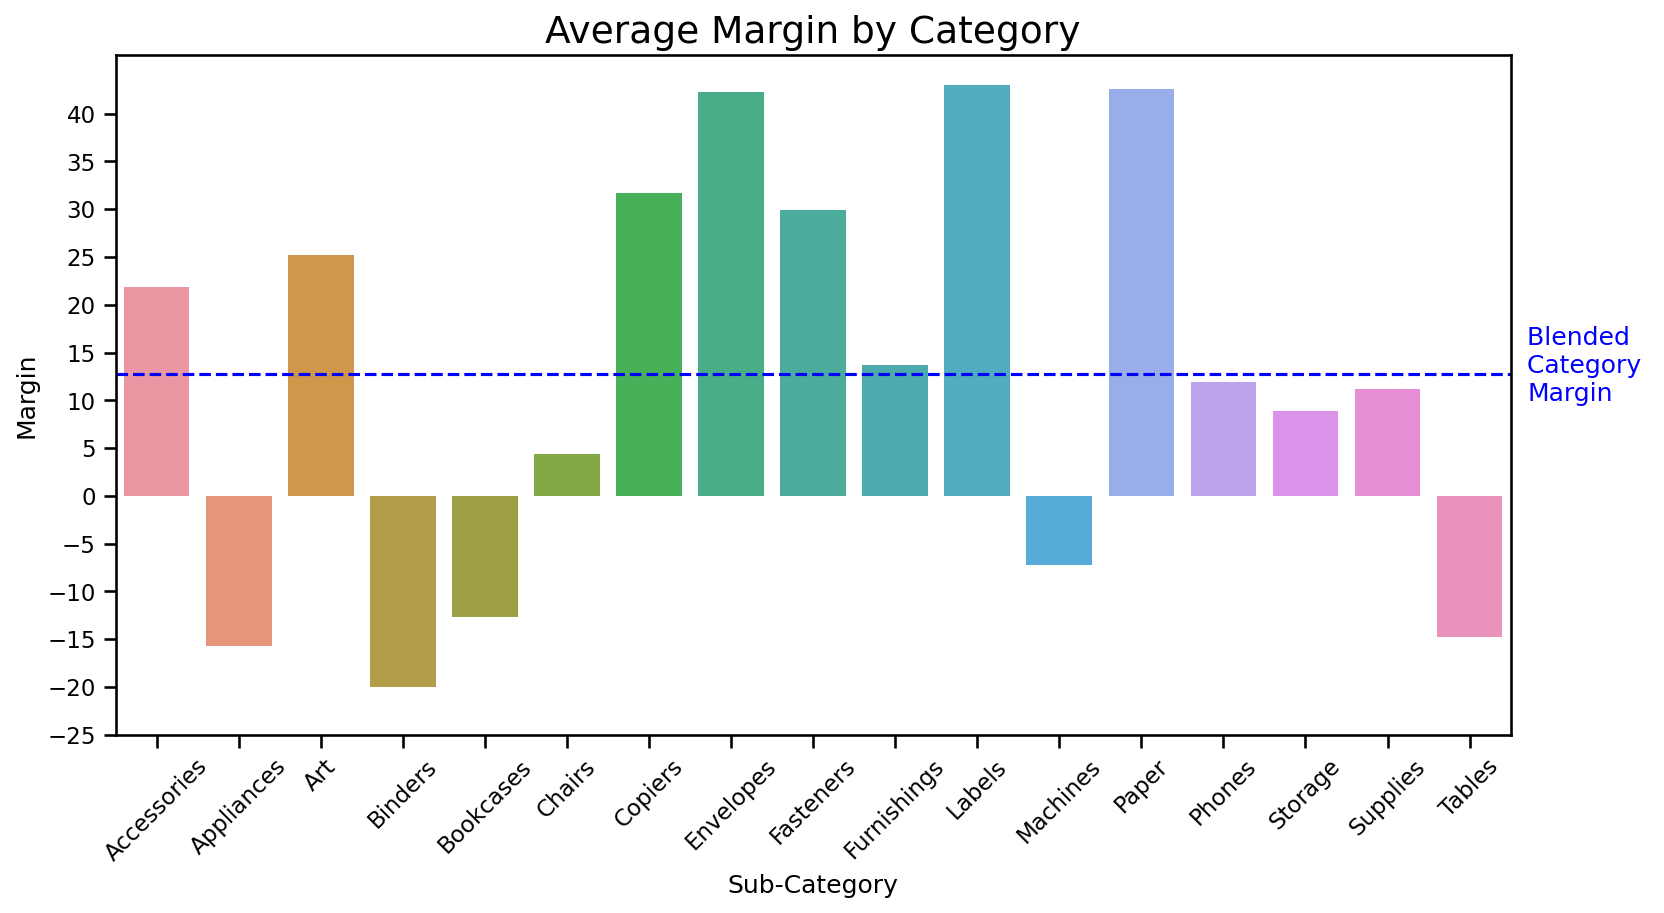

In [478]:
cat_margin = df.groupby(['Sub-Category'], as_index = False)['margin'].mean()

plt.figure(dpi=150, figsize=(12,6))
graph = sns.barplot(x = 'Sub-Category', y = 'margin', data = cat_margin)
plt.grid(False)
plt.xticks(rotation=45)
plt.yticks(range(-25,45,5))
plt.ylabel("Margin")
plt.xlabel("Sub-Category")
plt.title('Average Margin by Category', fontsize=18)
graph.axhline(cat_margin['margin'].mean(), ls = '--', color = 'blue')
graph.text(16.7,10, "Blended \nCategory \nMargin", color = 'blue');

#Below we have a graph of our Margin by category with a horizontal line for our blended category margin all items below our 
#blended category margin present an opportunity to improve margin

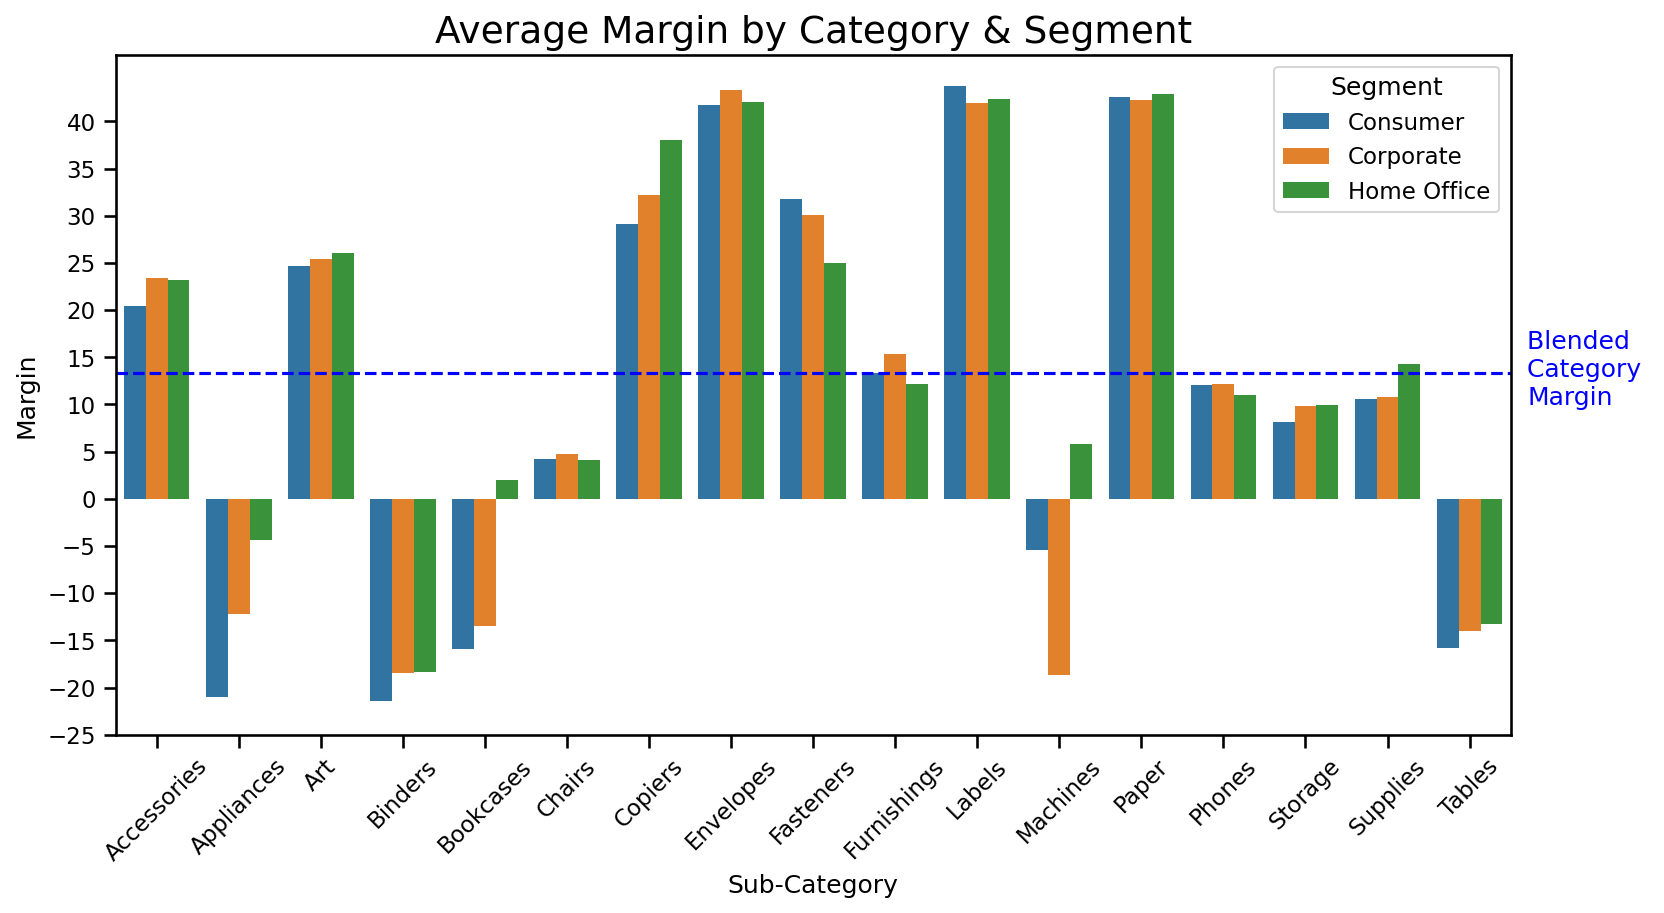

In [480]:
cat_margin1 = df.groupby(['Sub-Category','Segment'], as_index = False)['margin'].mean()

plt.figure(dpi=150, figsize=(12,6))
graph = sns.barplot(x = 'Sub-Category', y = 'margin', data = cat_margin1, hue = 'Segment')
plt.grid(False)
plt.xticks(rotation=45)
plt.yticks(range(-25,45,5))
plt.ylabel("Margin")
plt.xlabel("Sub-Category")
plt.title('Average Margin by Category & Segment', fontsize=18)
graph.axhline(cat_margin1['margin'].mean(), ls = '--', color = 'blue')
graph.text(16.7,10, "Blended \nCategory \nMargin", color = 'blue');

#Further exploring our margin by category and market segment, we can see that for the most part the market segments maintain 
#parity. but there are a couple exceptions: Consumer appliances and Corporate Machines deviate significantly from other segments


# Lets explore the 5 Sub-Categories that have a negative margin

Below are 5 frames that present the 20 worst margined products in our lowest performing sub-categories. These products provide a significant opportunity to improve margin 


In [502]:
accessories_low_margin = df[(df['Sub-Category'] == 'Accessories') & (df['Product Name'].map(df.value_counts('Product Name'))>2)]\
.groupby('Product Name', as_index = False)['margin'].mean().nsmallest(20,'margin')

accessories_low_margin

#Below is list of the 20 worst margin products by sub-category "Accessories" and has been sold more than 2 times

,Product Name,margin
47,Logitech Keyboard K120,-11.250000
109,SanDisk Ultra 16 GB MicroSDHC Class 10 Memory ...,-10.785714
119,V7 USB Numeric Keypad,-10.437500
77,Memorex 25GB 6X Branded Blu-Ray Recordable Dis...,-4.625000
19,Imation�Clip USB�flash drive�- 8 GB,-4.071429
63,Logitech�VX Revolution Cordless Laser Mouse fo...,-3.400000
4,Belkin Standard 104 key USB Keyboard,-2.708333
112,Sony 16GB Class 10 Micro SDHC R40 Memory Card,-1.250000
90,Microsoft Natural Keyboard Elite,-0.937500
31,Kingston Digital DataTraveler 32GB USB 2.0,-0.714286


In [503]:
binders_low_margin = df[(df['Sub-Category'] == 'Binders') & (df['Product Name'].map(df.value_counts('Product Name'))>2)]\
.groupby('Product Name', as_index = False)['margin'].mean().nsmallest(20,'margin')

binders_low_margin

#Below is list of the 20 worst margin products by sub-category "appliance" and has been sold more than 2 times

,Product Name,margin
41,Avery Hidden Tab Dividers for Binding Systems,-99.285714
102,GBC Plasticlear Binding Covers,-98.095238
142,Insertable Tab Indexes For Data Binders,-90.800000
121,GBC VeloBinder Electric Binding Machine,-87.500000
153,"Premier Elliptical Ring Binder, Black",-79.111111
7,Acco Economy Flexible Poly Round Ring Binder,-77.604167
51,Avery Reinforcements for Hole-Punch Pages,-75.885417
56,"Avery Triangle Shaped Sheet Lifters, Black, 2/...",-75.000000
172,Storex DuraTech Recycled Plastic Frosted Binders,-75.000000
5,Acco D-Ring Binder w/DublLock,-74.722222


In [504]:
bookcases_low_margin = df[(df['Sub-Category'] == 'Bookcases') & (df['Product Name'].map(df.value_counts('Product Name'))>2)]\
.groupby('Product Name', as_index = False)['margin'].mean().nsmallest(20,'margin')

bookcases_low_margin

#Below is list of the 20 worst margin products by sub-category "appliance" and has been sold more than 2 times

,Product Name,margin
19,O'Sullivan 4-Shelf Bookcase in Odessa Pine,-82.913866
9,"Bush Westfield Collection Bookcases, Dark Cher...",-63.555556
31,Sauder Barrister Bookcases,-63.455882
3,Bestar Classic Bookcase,-46.713235
5,"Bush Cubix Collection Bookcases, Fully Assembled",-36.888889
34,Sauder Cornerstone Collection Library,-31.750000
36,"Sauder Forest Hills Library with Doors, Woodla...",-31.318627
26,O'Sullivan Plantations 2-Door Library in Landv...,-28.717647
13,Hon 4-Shelf Metal Bookcases,-26.785714
17,O'Sullivan 2-Shelf Heavy-Duty Bookcases,-23.666667


In [505]:
machines_low_margin = df[(df['Sub-Category'] == 'Machines') & (df['Product Name'].map(df.value_counts('Product Name'))>2)]\
.groupby('Product Name', as_index = False)['margin'].mean().nsmallest(20,'margin')
machines_low_margin
#Below is list of the 20 worst margin products by sub-category "appliance" and has been sold more than 2 times

,Product Name,margin
1,Cubify CubeX 3D Printer Double Head Print,-95.277778
8,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,-42.500000
9,Swingline SM12-08 MicroCut Jam Free Shredder,-42.500000
5,Lexmark MX611dhe Monochrome Laser Printer,-36.111111
7,Ricoh - Ink Collector Unit for GX3000 Series P...,-35.861111
11,Zebra GX420t Direct Thermal/Thermal Transfer P...,-6.500000
6,Okidata C331dn Printer,1.333333
2,DYMO CardScan Personal V9 Business Card Scanner,6.944444
0,Bady BDG101FRU Card Printer,8.291667
4,HP Designjet T520 Inkjet Large Format Printer ...,9.333333


In [506]:
table_low_margin = df[(df['Sub-Category'] == 'Tables') & (df['Product Name'].map(df.value_counts('Product Name'))>2)]\
.groupby('Product Name', as_index = False)['margin'].mean().nsmallest(20,'margin')
table_low_margin
#Below is list of the 20 worst margin products by sub-category "appliance" and has been sold more than 2 times

,Product Name,margin
14,BoxOffice By Design Rectangular and Half-Moon ...,-68.727273
9,Bevis Rectangular Conference Tables,-61.000000
49,Riverside Furniture Stanwyck Manor Table Series,-47.619048
3,Balt Split Level Computer Training Table,-40.200000
0,BPI Conference Tables,-35.757576
43,KI Conference Tables,-32.250000
19,Bush Advantage Collection Racetrack Conference...,-31.747681
40,Hon Rectangular Conference Tables,-31.416667
45,"Lesro Round Back Collection Coffee Table, End ...",-30.629464
1,Balt Solid Wood Rectangular Table,-29.034091


In [521]:
low_margin_concat = pd.concat([table_low_margin,machines_low_margin,bookcases_low_margin,binders_low_margin,accessories_low_margin])


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   day_to_ship    9994 non-null   int64         
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [557]:
# df.loc[df['Product Name'].str.contains('Balt Solid')]
cleaned_margin = pd.merge(df,low_margin_concat, how = 'outer',on = 'Product Name', indicator = True)\
.query('_merge=="left_only"')
cleaned_margin['Profit'].sum()


314996.3687

In [556]:
df['Profit'].sum()

286397.0217

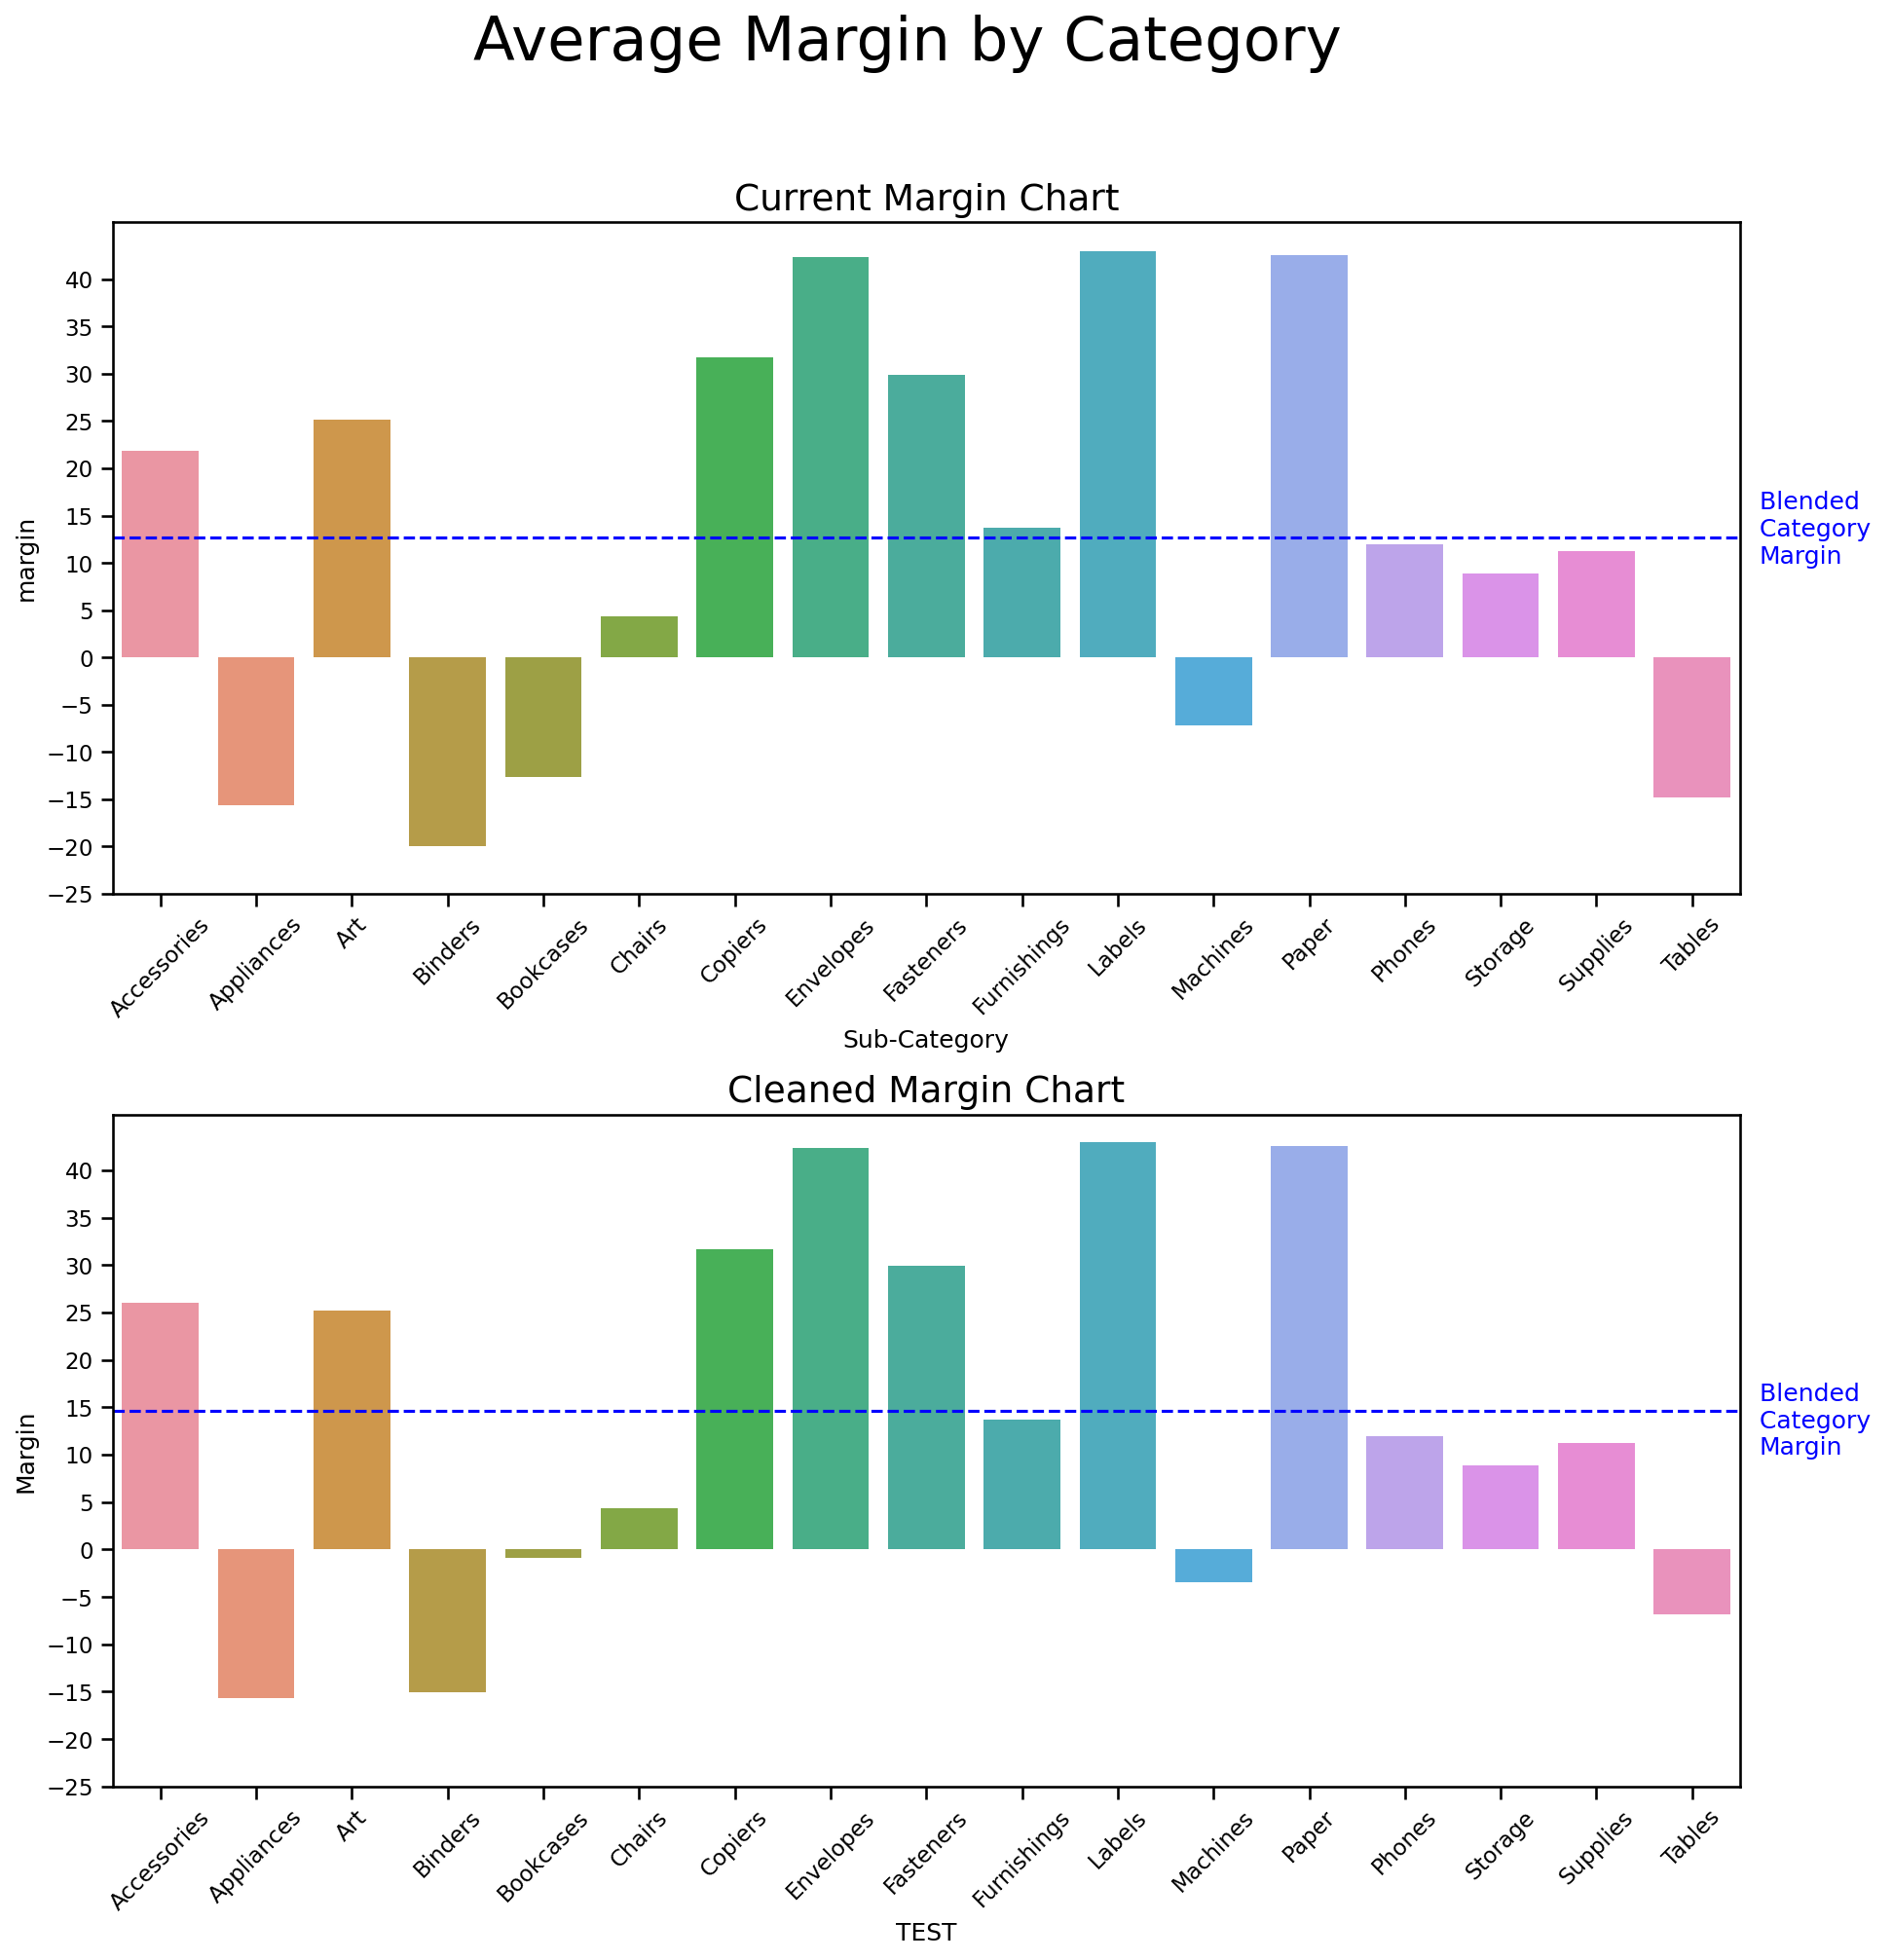

In [618]:
cleaned_cat_margin = cleaned_margin.groupby(['Sub-Category'], as_index = False)['margin_x'].mean()

# plt.figure(dpi=150, figsize=(20,10))
fig, axes = plt.subplots(2, figsize=(12,12), dpi = 150)
plt.suptitle("Average Margin by Category", size = 30, y=1.05)
fig.tight_layout(h_pad = 7)
graph = sns.barplot(x = 'Sub-Category', y = 'margin', data = cat_margin, ax=axes[0])
graph2 = sns.barplot(x = 'Sub-Category', y = 'margin_x', data = cleaned_cat_margin, ax=axes[1])
plt.grid(False)
plt.xticks(rotation=45)
graph.set_xticklabels(cat_margin['Sub-Category'],rotation = 45)
axes[0].set_yticks(range(-25,45,5))
axes[1].set_yticks(range(-25,45,5))
plt.ylabel("Margin")
plt.xlabel("TEST")
graph.set_title('Current Margin Chart', fontsize=18)
graph2.set_title('Cleaned Margin Chart', fontsize=18)
graph.axhline(cat_margin['margin'].mean(), ls = '--', color = 'blue')
graph2.axhline(cleaned_cat_margin['margin_x'].mean(), ls = '--', color = 'blue')
graph.text(16.7,10, "Blended \nCategory \nMargin", color = 'blue')
graph2.text(16.7,10, "Blended \nCategory \nMargin", color = 'blue');

In [619]:
cleaned_margin['Profit'].sum()-df['Profit'].sum()

28599.34700000001